In [1]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns
sns.set()

# Import et EDA

Nous utilisons un jeu de données qui contient 5000 clients d'une société de telecom. La première colonne indique si les clients ont, ou non, résilié. Les suivantes sont d'éventuels facteurs explicatifs.

In [2]:
# https://query.data.world/s/jb75k2kxn5ajlcxsmvlnorxyj4pisx
df = pd.read_csv('https://bit.ly/2Pkupqx')

df.info()

df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
churn                         5000 non-null object
accountlength                 5000 non-null int64
internationalplan             5000 non-null object
voicemailplan                 5000 non-null object
numbervmailmessages           5000 non-null int64
totaldayminutes               5000 non-null float64
totaldaycalls                 5000 non-null int64
totaldaycharge                5000 non-null float64
totaleveminutes               5000 non-null float64
totalevecalls                 5000 non-null int64
totalevecharge                5000 non-null float64
totalnightminutes             5000 non-null float64
totalnightcalls               5000 non-null int64
totalnightcharge              5000 non-null float64
totalintlminutes              5000 non-null float64
totalintlcalls                5000 non-null int64
totalintlcharge               5000 non-null float64
numbercustomerservicecal

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
1349,No,71,no,yes,22,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,3,1.51,2
4118,No,175,no,no,0,185.0,104,31.45,325.8,86,27.69,85.4,105,3.84,14.6,2,3.94,1
4405,No,137,no,no,0,203.1,97,34.53,132.0,76,11.22,250.9,94,11.29,9.2,4,2.48,4


In [3]:
df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Combien de personnes ont résilié ?

In [4]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

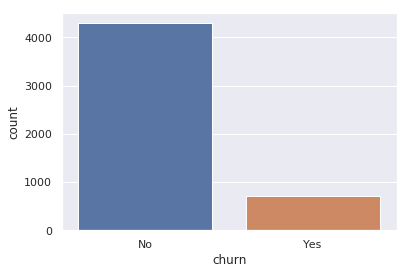

In [5]:
sns.countplot(df['churn'])
plt.show()

In [6]:
df['churn'].value_counts() / len(df)

No     0.8586
Yes    0.1414
Name: churn, dtype: float64

Observons les corrélations deyx-à-deux des facteurs explicatifs. Les couleurs indiquent si le client a résilié ou pas.

/home/girardea/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


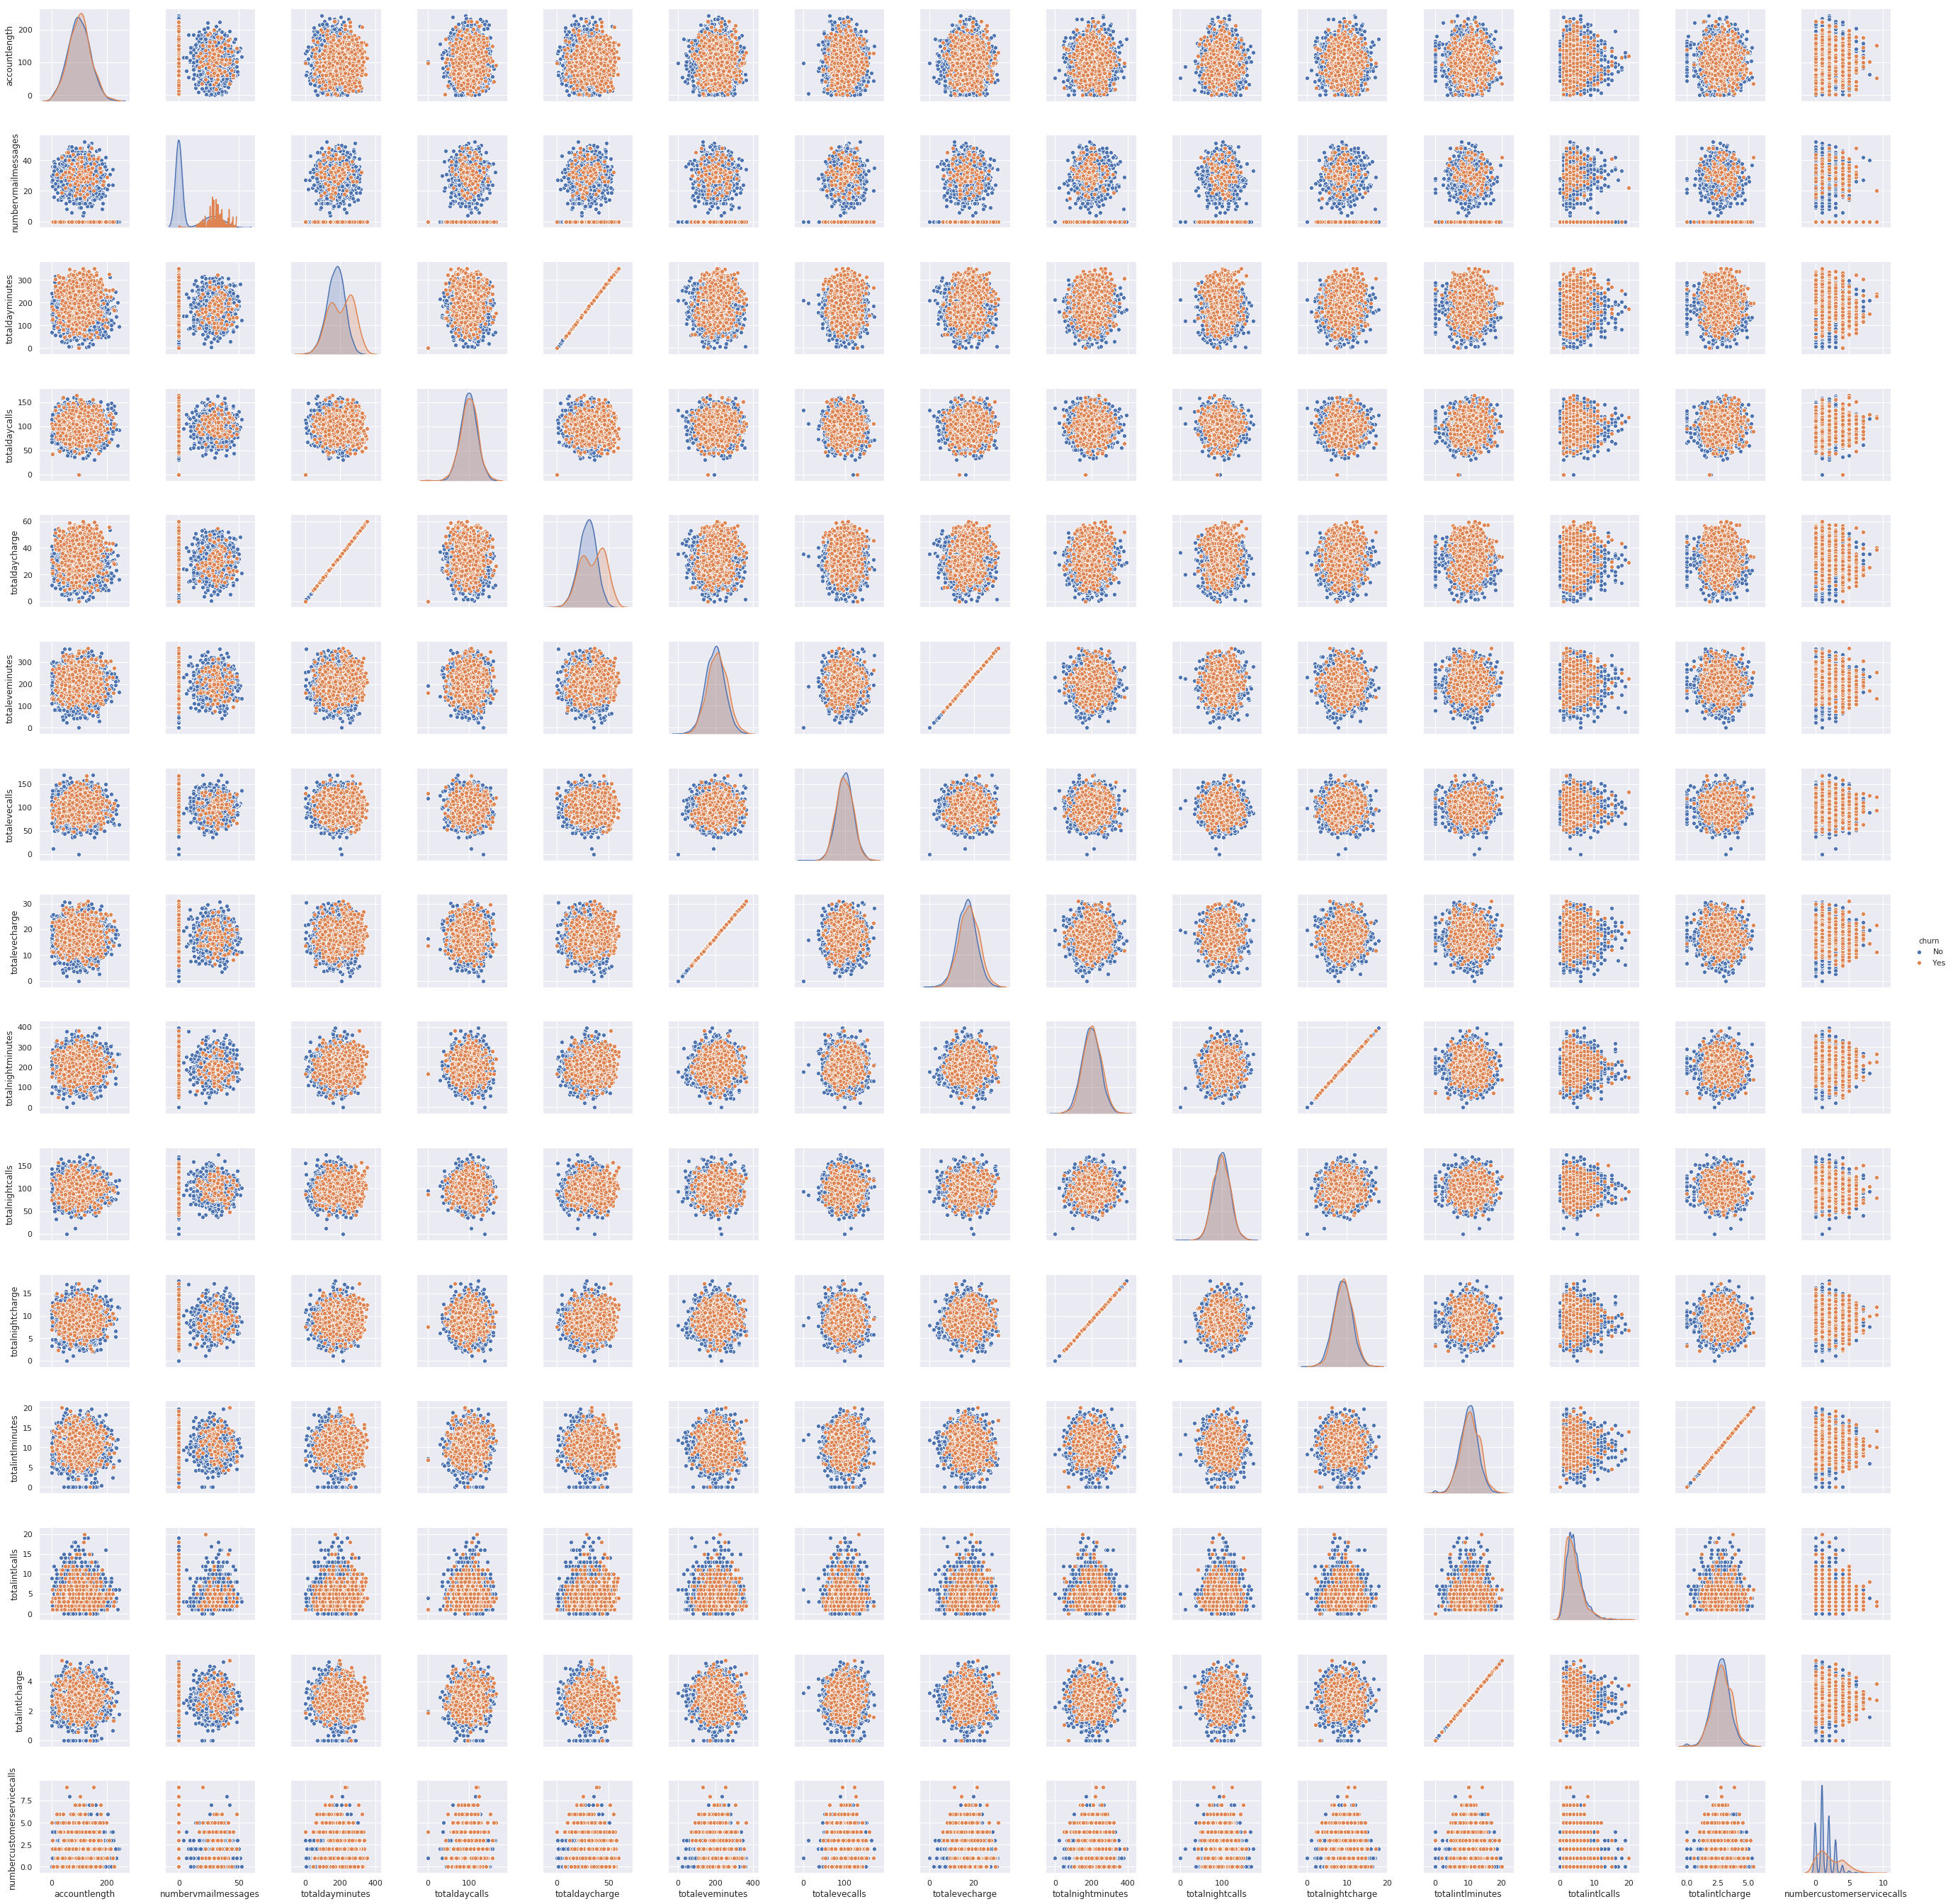

In [7]:
sns.pairplot(df, hue='churn')
plt.show()

Et la matrice de corrélation :

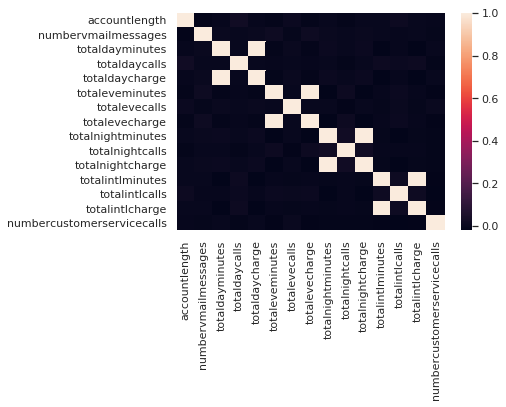

In [8]:
sns.heatmap(df.corr())
plt.show()

Supprimons les corrélations de 100%.

In [9]:
for col in ['totaldaycharge', 'totalevecharge', 'totalnightcharge',
            'totalintlcharge']:
    del df[col]

## Classification

Testons un premier algo.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
print(SCORERS.keys())
from sklearn.ensemble import RandomForestClassifier

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


In [11]:
X = df[[col for col in df if col not in ['churn', 'internationalplan',
                                         'voicemailplan']]]
y = df['churn']

cross_val_score(RandomForestClassifier(n_estimators=100), X, y == 'Yes',
                scoring='f1', cv=5)

array([0.64347826, 0.6784141 , 0.62264151, 0.69603524, 0.68807339])

In [12]:
cross_val_score(RandomForestClassifier(n_estimators=100), X, y == 'Yes',
                scoring='roc_auc', cv=5)

array([0.84466051, 0.85815065, 0.84830208, 0.90282117, 0.86029691])

Quel serait le score d'un classificateur qui tire au hasard ?

Quel serait le score d'un estimateur à seuil sur `totaldayminutes` et `numbercustomerservicecalls` ? Optimisez le seuil !

# Pipelines

Avec les pipelines, on va pouvoir faire toutes les pré-transformations de données directement comme si on utilisati un classificateur.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.drop(columns=['churn'])
y = df['churn']

In [15]:
drop_str_cols = ColumnTransformer(
    transformers=[
        ('drop_str_cols', 'drop', ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_v1 = Pipeline(steps=[
    ('drop_str_cols', drop_str_cols),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='f1', cv=5))
print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='roc_auc', cv=5))

[0.67826087 0.66956522 0.63551402 0.69683258 0.69369369]
[0.85751529 0.86150781 0.85128262 0.90096133 0.87181967]


# Que faire de données textuelles

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder()

ohe.fit_transform([['Yes'], ['Yes'], ['No']]).toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [18]:
enc_str_cols = ColumnTransformer(
    transformers=[
        ('enc_str_cols', OneHotEncoder(), ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_v1 = Pipeline(steps=[
    ('enc_str_cols', enc_str_cols),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='f1', cv=5))
print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='roc_auc', cv=5))

[0.78431373 0.77108434 0.78838174 0.7639485  0.82786885]
[0.91132827 0.91400498 0.90009825 0.92702805 0.93690588]


## Comparer à d'autres algos

C'oubliez pas de toujours comparer vos algorithmes sophistiqués à des algorithmes idiots.

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
print(cross_val_score(DummyClassifier("uniform"), X, y == 'Yes',
                      scoring='f1', cv=5))
print(cross_val_score(DummyClassifier("uniform"), X, y == 'Yes',
                      scoring='roc_auc', cv=5))

[0.22985075 0.22535211 0.215781   0.2347561  0.23510972]
[0.5 0.5 0.5 0.5 0.5]


In [21]:
print(cross_val_score(DummyClassifier("most_frequent"), X, y == 'Yes',
                      scoring='f1', cv=5))
print(cross_val_score(DummyClassifier("most_frequent"), X, y == 'Yes',
                      scoring='roc_auc', cv=5))

[0. 0. 0. 0. 0.]
[0.5 0.5 0.5 0.5 0.5]


/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/girardea/.local/lib/python3.6/site-packages/sklearn/metric

# Exercice

Trouvez le meilleur AUC Score possible (on ne peut pas aller au-dessus de 100%...).

Le temps de calcul compte également !

Vous pouvez utilisez les algos que vous voulez.

In [22]:
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier, RandomForestClassifier)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
enc_str_cols = ColumnTransformer(
    transformers=[
        ('enc_str_cols', OneHotEncoder(), ['internationalplan', 'voicemailplan'])
    ], remainder='passthrough')

pipe_v1 = Pipeline(steps=[
    ('enc_str_cols', enc_str_cols),
    ('scaler', StandardScaler()),
    ('rf', GradientBoostingClassifier(n_estimators=500))
])

print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='f1', cv=5))
print(cross_val_score(pipe_v1, X, y == 'Yes', scoring='roc_auc', cv=5))

[0.82758621 0.85171103 0.80645161 0.84615385 0.84375   ]
[0.91414845 0.91107413 0.91215251 0.92139067 0.94742846]


In [24]:
pipe_v1.fit(X, y)
%timeit y_pred = pipe_v1.predict(X)

40.7 ms ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Je vous propose de tester toutes les variables explicatives afin de n'en retenir que les plus utiles.

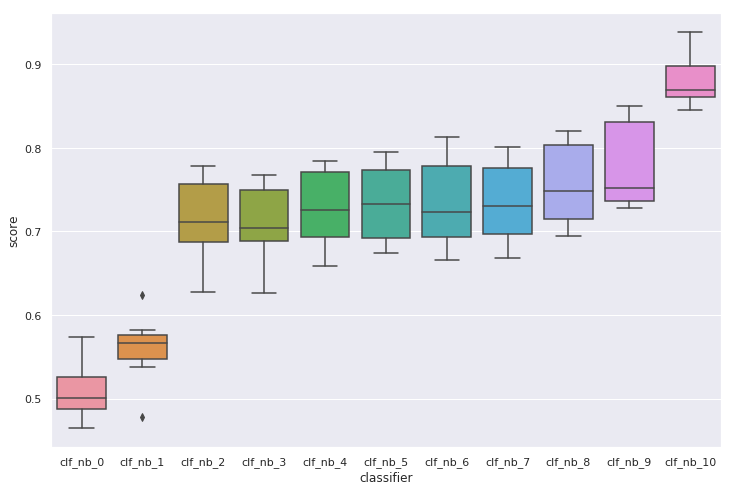

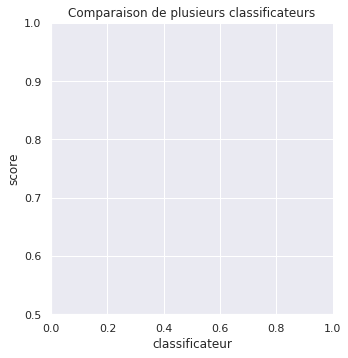

In [27]:
X = df[[col for col in df if col not in ['internationalplan', 'churn', 'voicemailplan']]]
y = df['churn']

nb = 10

df_res = pd.DataFrame()

for i in range(X.shape[1]):
    Xt = X.iloc[:, :i+1]
    
    clf = GradientBoostingClassifier()
    
    df_res = pd.concat([
        df_res,
        pd.DataFrame({
            'classifier': f'clf_nb_{i}',
            'score': cross_val_score(clf, Xt, y, cv=nb, scoring='roc_auc')
        })
    ])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.catplot(y='score', x='classifier', kind='box', data=df_res, ax=ax)

ax.set(
    title="Comparaison de plusieurs classificateurs",
    xlabel="classificateur",
    ylabel="score",
    ylim=[0.5, 1]
)